In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import wfdb
from wfdb import processing
from IPython.display import display
from scipy import signal
%matplotlib inline

## Load the data

In [3]:
# Download the dataset
'''
PATH_TO_DATA = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
data = pd.read_csv(PATH_TO_DATA, header=None)
print(data.shape)
data.head()
'''
#pd.concat([h, t], axis=0)
a = [
'04015',
'04043',
'04048',
'04126',
'04746',
'04908',
'04936',
'05091',
'05121',
'05261',
'06426',
'06453',
'06995',
'07162',
'07859',
'07879',
]



#'07910','08215','08219','08378','08405','08434','08455',

all_frames = pd.DataFrame()
for record_number in ['05121']:
    #record_number = '06995'
    filepath = 'D:/phd/mit-bih-atrial-fibrillation-database-1.0.0/files/' + record_number
    record = wfdb.rdrecord(filepath)#, sampto = 10000)
    ann = wfdb.rdann(filepath,'atr')
    sig = record.p_signal[:,0]
    sig_peaks, _ = processing.find_peaks(sig)
    Rpeaks = []
    for i in sig_peaks:
        if sig[i] > 0.25:
            Rpeaks.append(i)
    s = []
    annIndexes = []
    for i in range(len(sig_peaks)):
        val = sig_peaks[i]
        if val < 100:
            continue
        for j in ann.sample:
            if val-100 < j and val + 100 > j:
                annIndexes.append(i)
                s.append(record.p_signal[val -100:val + 100,0])
                break
    
    s = []
    for i in range(0, len(sig), 140):
        if i+140 > len(sig):
            break
        s.append(sig[i:i+140])
    data = pd.DataFrame(s)
    b = ann.sample / 140
    ind = []
    for i in b:
        ind.append(int(i))
    data[140] = 1    
    #df.loc[df['A'] > 2, 'B'] = new_val
    #data[140][ind] = 0
    data.loc[ind, 140] = 0
    all_frames = pd.concat([all_frames, data], axis=0, ignore_index=True)
data = all_frames


In [4]:
def R_correction(signal, peaks):
    num_peak=peaks.shape[0]
    peaks_corrected_list=list()
    for index in range(num_peak):
        i=peaks[index]
        cnt=i
        if cnt-1<0:
            break
        if signal[cnt]<signal[cnt-1]:
            while signal[cnt]<signal[cnt-1]:
                cnt-=1
                if cnt<0:
                    break
        elif signal[cnt]<signal[cnt+1]:
            while signal[cnt]<signal[cnt+1]:
                cnt+=1
                if cnt<0:
                    break
        peaks_corrected_list.append(cnt)
    peaks_corrected=np.asarray(peaks_corrected_list)            
    return peaks_corrected 

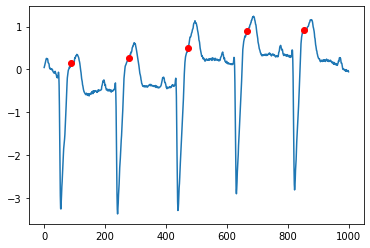

In [5]:
#!pip install py-ecg-detectors
from ecgdetectors import Detectors
import pandas as pd
fs=100 # sample freq
p = sig[:1000]
detectors = Detectors(250)

r_peaks_pan = detectors.pan_tompkins_detector(p)
r_peaks_pan= np.asarray(r_peaks_pan)

#plt.plot(p)
#plt.plot(r_peaks_pan,p[r_peaks_pan], 'ro')
corrected_R_peak=R_correction(p,r_peaks_pan)
plt.plot(p)
plt.plot(corrected_R_peak,p[corrected_R_peak], 'ro')

A1
A2


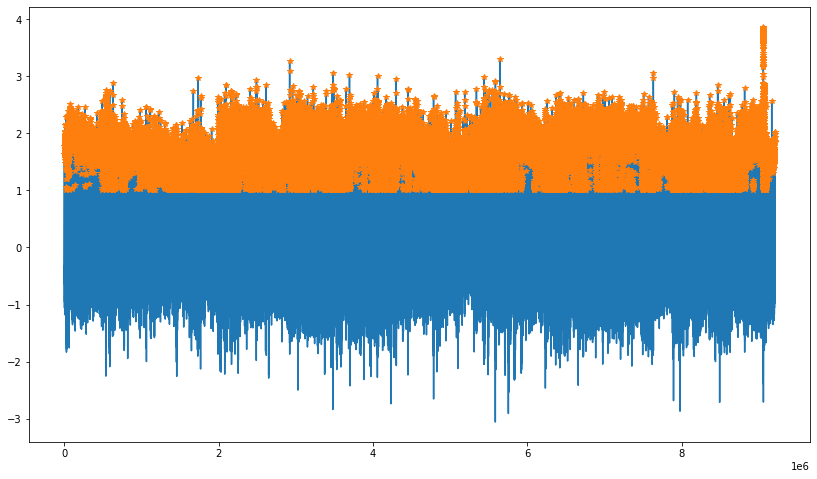

2162653 2162708 12000
2162752 2162708 12001
2163507 2163556 12010
2163601 2163556 12011
4057893 4057942 23910
4057994 4057942 23911
4061927 4062020 23943
4062116 4062020 23944
4387350 4387405 25952
4387461 4387405 25953
5497090 5497141 32800
5497192 5497141 32801
5500873 5500961 32856
5501048 5500961 32857
5585969 5586022 33519
5586074 5586022 33520
5593042 5593100 33589
5593153 5593100 33590
5707625 5707701 34506
5707778 5707701 34507
5764350 5764404 34927
5764460 5764404 34928
5766155 5766060 34942
6484647 6484710 39425
6484775 6484710 39426
6598247 6598300 40255
6598354 6598300 40256
7405243 7405319 44732
7405397 7405319 44733
7406447 7406544 44742
7406643 7406544 44743
A3


In [6]:
a = [
'04015',
'04043',
'04048',
'04126',
'04746',
'04908',
'04936',
'05091',
'05121',
'05261',
'06426',
'06453',
'06995',
'07162',
'07859',
'07879',
]



#'07910','08215','08219','08378','08405','08434','08455',

all_frames = pd.DataFrame()
for record_number in ['05261']:
    #record_number = '06995'
    filepath = 'D:/phd/mit-bih-atrial-fibrillation-database-1.0.0/files/' + record_number
    record = wfdb.rdrecord(filepath)#, sampto = 10000)
    ann = wfdb.rdann(filepath,'atr')
    sig = record.p_signal[:,0]
    print('A1')
    sig_peaks, _ = signal.find_peaks(sig)
    Rpeaks = []
    print('A2')
    for i in sig_peaks:
        if sig[i] > 1.0:
            Rpeaks.append(i)
    plt.figure(figsize=(14,8))
    plt.plot(sig)
    #plt.plot(t, sign[t], "*")
    plt.plot(Rpeaks, sig[Rpeaks], '*')
    plt.show()
    s = []
    annIndexes = []
    for i in range(len(Rpeaks)):
        val = Rpeaks[i]
        if val < 100:
            continue
        s.append(record.p_signal[val-100: val+100,0])
        for j in ann.sample:
            if val-100 < j and val + 100 > j:
                annIndexes.append(len(s) - 1)
                print(val, j, i)
                break
    data = pd.DataFrame(s)
    print('A3')
    data[200] = 1    
    #df.loc[df['A'] > 2, 'B'] = new_val
    #data[140][ind] = 0
    data.loc[annIndexes, 200] = 0
    all_frames = pd.concat([all_frames, data], axis=0, ignore_index=True)
data = all_frames

In [7]:
len(annIndexes)

31

## Split the data for training and testing

In [8]:
# last column is the target
# 0 = anomaly, 1 = normal
TARGET = 200

features = data.drop(TARGET, axis=1)
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

In [9]:
# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

## Scale the data using MinMaxScaler

In [10]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

## Build an AutoEncoder model

In [11]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [12]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
88/88 [==============================] - 2s 9ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/20
88/88 [==============================] - 1s 7ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/20
88/88 [==============================] - 1s 7ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/20
88/88 [==============================] - 1s 7ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/20
88/88 [==============================] - 1s 7ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/20
88/88 [==============================] - 1s 7ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/20
88/88 [==============================] - 1s 7ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/20
88/88 [==============================] - 1s 7ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 9/20
88/88 [==============================] - 1s 7

## Plot history

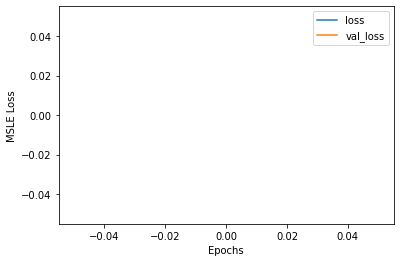

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

## Find threshold

In [14]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def find_threshold_method_two(model, x_train_scaled):
  # another method to find threshold
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  threshold_2 = np.percentile(reconstruction_errors, 95)
  return threshold_2

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

def get_mask(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  return errors

In [15]:
threshold = find_threshold(model, x_train_scaled)
print(f"Threshold method one: {threshold}")

threshold_2 = find_threshold_method_two(model, x_train_scaled)
print(f"Threshold method two: {threshold_2}")

1404/1404 [==============================] - 1s 996us/step
Threshold method one: nan
1404/1404 [==============================] - 1s 922us/step
Threshold method two: nan


In [16]:
preds = get_predictions(model, x_test_scaled, threshold)
accuracy_score(preds, y_test)

351/351 [==============================] - 0s 979us/step


0.999465811965812

In [17]:
ti = target[target == 0].index
dt = features
dt_scaled = min_max_scaler.fit_transform(dt.copy())
coef = 0.2
ans = get_predictions(model, dt_scaled, threshold)
ans2 = get_predictions(model, dt_scaled, threshold_2 * coef)
ans.value_counts()

1755/1755 [==============================] - 2s 1ms/step


1.0    56160
dtype: int64

In [18]:
# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svm, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for RBF SVM')
plt.show(matrix)
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
def calculateAcc(target, ans):
    ans_arr = np.zeros(len(data[140]))
    m = np.zeros((2,2))
    #ans_arr
    for i in range(len(target)):
        if target.iloc[i] == ans[i] and ans[i] == 0:
            m[0][0] +=1
        if target.iloc[i] == ans[i] and ans[i] == 1:
            m[1][1] +=1
        if target.iloc[i] != ans[i] and ans[i] == 0:
            m[0][1] +=1
        if target.iloc[i] != ans[i] and ans[i] == 1:
            m[1][0] +=1

        if target.iloc[i] == ans[i]:
            ans_arr[i] = 1
    print(sum(ans_arr)/len(ans_arr))
    return m
m = calculateAcc(target, ans)
m2 = calculateAcc(target, ans2)

In [ ]:
m[0][0]/(m[0][0] + m[0][1])

In [ ]:
m[1][1]/(m[1][0] + m[1][1])

In [ ]:
print(m[0][0], " ", m[0][1], '\n', m[1][0], m[1][1], sep = '')

In [130]:
print(m2[0][0], " ", m2[0][1], '\n', m2[1][0], m2[1][1])

20.0   34631.0 
 22.0 31082.0


In [293]:
t1 = target[target == 0].index.to_numpy()
t2 = ans[ans == 0].index.to_numpy()

In [23]:
for i in range(len(target)):
    if target.iloc[i] != ans[i] and ans[i] == 1:
        print(i, target.iloc[i],ans[i])
    

0 0 1.0
732 0 1.0
854 0 1.0
869 0 1.0
872 0 1.0
952 0 1.0
1191 0 1.0
7830 0 1.0
7843 0 1.0
8109 0 1.0
8139 0 1.0
10160 0 1.0
10168 0 1.0
10423 0 1.0
10431 0 1.0
65755 0 1.0
67658 0 1.0
68443 0 1.0
84221 0 1.0
84344 0 1.0
84575 0 1.0
85325 0 1.0
85363 0 1.0
85609 0 1.0
86003 0 1.0
86053 0 1.0
88035 0 1.0
88052 0 1.0
89501 0 1.0
89699 0 1.0
91520 0 1.0
91737 0 1.0
91938 0 1.0
92045 0 1.0
92114 0 1.0
92233 0 1.0
92286 0 1.0
92393 0 1.0
92597 0 1.0
93256 0 1.0
93357 0 1.0
93484 0 1.0
93697 0 1.0
93895 0 1.0
93950 0 1.0
94274 0 1.0
94347 0 1.0
94805 0 1.0
95045 0 1.0
95293 0 1.0
95359 0 1.0
95614 0 1.0
95641 0 1.0
95806 0 1.0
95876 0 1.0
95987 0 1.0
97163 0 1.0
97395 0 1.0
97676 0 1.0
97720 0 1.0
97789 0 1.0
97958 0 1.0
98092 0 1.0
98268 0 1.0
98416 0 1.0
98631 0 1.0
98805 0 1.0
98876 0 1.0
98972 0 1.0
99327 0 1.0
100371 0 1.0
100462 0 1.0
101308 0 1.0
101482 0 1.0
101650 0 1.0
101807 0 1.0
101929 0 1.0
102014 0 1.0
102135 0 1.0
102222 0 1.0
102343 0 1.0
102441 0 1.0
102495 0 1.0
102558 0 1

## Tuning AutoEncoder using keras tuner



In [122]:
!pip install -U keras-tuner

In [123]:
import kerastuner as kt

class AutoEncoderTuner(Model):

  def __init__(self, hp, output_units, code_size=8):
    super().__init__()
    dense_1_units = hp.Int('dense_1_units', min_value=16, max_value=72, step=4)
    dense_2_units = hp.Int('dense_2_units', min_value=16, max_value=72, step=4)
    dense_3_units = hp.Int('dense_3_units', min_value=16, max_value=72, step=4)
    dense_4_units = hp.Int('dense_4_units', min_value=16, max_value=72, step=4)
    dense_5_units = hp.Int('dense_5_units', min_value=16, max_value=72, step=4)
    dense_6_units = hp.Int('dense_6_units', min_value=16, max_value=72, step=4)
    
    self.encoder = Sequential([
      Dense(dense_1_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_2_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_3_units, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(dense_4_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_5_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_6_units, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded


def build_model(hp):
  model = AutoEncoderTuner(hp, 140)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(
      loss='msle',
      optimizer=Adam(learning_rate=hp_learning_rate),
  )
  return model

C:\Users\houfo\AppData\Local\Temp\ipykernel_19092\3309659638.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [124]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    factor=3,
    directory='autoencoder',
    project_name='tuning_autoencoder6'
)

tuner.search(
    x_train_scaled, 
    x_train_scaled, 
    epochs=20, 
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

INFO:tensorflow:Reloading Oracle from existing project autoencoder\tuning_autoencoder6\oracle.json
INFO:tensorflow:Reloading Tuner from autoencoder\tuning_autoencoder6\tuner0.json
INFO:tensorflow:Oracle triggered exit


In [125]:
hparams = [f'dense_{i}_units' for i in range(1,7)] + ['learning_rate']
best_hyperparams = tuner.get_best_hyperparameters()
for hps in hparams:
  print(f"{hps}: {best_hyperparams[0][hps]}")

dense_1_units: 24
dense_2_units: 64
dense_3_units: 64
dense_4_units: 48
dense_5_units: 20
dense_6_units: 20
learning_rate: 0.01


In [126]:
best_model = tuner.get_best_models()[0]
best_model.compile(loss='msle', optimizer=Adam(0.001))

best_model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
103/103 [==============================] - 3s 19ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 2/20
103/103 [==============================] - 2s 17ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/20
103/103 [==============================] - 2s 17ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/20
103/103 [==============================] - 2s 17ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/20
103/103 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/20
103/103 [==============================] - 2s 17ms/step - loss: 0.0011 - val_loss: 9.6532e-04
Epoch 7/20
103/103 [==============================] - 2s 18ms/step - loss: 0.0011 - val_loss: 9.1650e-04
Epoch 8/20
103/103 [==============================] - 2s 17ms/step - loss: 0.0011 - val_loss: 8.8817e-04
Epoch 9/20
103/103 [==============================] - 2s 18ms/step - loss: 0.0010 - val_loss: 8.6074e-04
Epoch 10/20
103/103 [==============================] - 2s 18ms/step - loss:

In [127]:
threshold_ = find_threshold(best_model, x_train_scaled)
preds_ = get_predictions(best_model, x_test_scaled, threshold_)
accuracy_score(preds_, y_test)

411/411 [==============================] - 1s 2ms/step


0.9765036879324767

In [33]:
ar = data.iloc[[4]].to_numpy()

In [196]:
h = data.head()
t = data.tail()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.260,-0.275,-0.250,-0.235,-0.250,-0.250,-0.275,-0.310,-0.340,-0.310,...,-0.285,-0.270,-0.285,-0.270,-0.270,-0.270,-0.275,-0.255,-0.255,0
1,-0.270,-0.240,-0.250,-0.250,-0.265,-0.290,-0.280,-0.275,-0.285,-0.285,...,-0.265,-0.240,-0.255,-0.245,-0.225,-0.265,-0.240,-0.240,-0.240,1
2,-0.275,-0.240,-0.275,-0.280,-0.275,-0.295,-0.290,-0.300,-0.290,-0.290,...,0.010,0.010,0.015,0.015,0.035,0.025,0.020,-0.015,-0.025,1
3,-0.045,-0.060,-0.070,-0.080,-0.070,-0.050,-0.080,-0.095,-0.105,-0.135,...,-0.160,-0.135,-0.130,-0.120,-0.135,-0.130,-0.095,-0.110,-0.100,1
4,-0.060,-0.050,-0.055,-0.075,-0.045,-0.045,-0.020,-0.025,-0.020,-0.025,...,0.685,0.220,-0.400,-0.910,-1.020,-0.885,-0.655,-0.485,-0.395,1
65750,-1.320,-1.045,-0.900,-0.825,-0.800,-0.815,-0.795,-0.745,-0.690,-0.640,...,-0.275,-0.285,-0.300,-0.300,-0.285,-0.295,-0.305,-0.300,-0.300,1
65751,-0.295,-0.265,-0.300,-0.280,-0.275,-0.300,-0.290,-0.275,-0.290,-0.300,...,-0.190,-0.205,-0.200,-0.215,-0.210,-0.220,-0.240,-0.230,-0.230,1
65752,-0.265,-0.265,-0.250,-0.265,-0.260,-0.270,-0.265,-0.270,-0.280,-0.315,...,-0.020,-0.090,-0.130,-0.165,-0.210,-0.235,-0.255,-0.240,-0.240,1
65753,-0.260,-0.300,-0.295,-0.305,-0.315,-0.335,-0.350,-0.340,-0.350,-0.320,...,-0.240,-0.215,-0.200,-0.185,-0.200,-0.200,-0.190,-0.200,-0.185,1
65754,-0.180,-0.225,-0.225,-0.225,-0.245,-0.260,-0.285,-0.350,-0.400,-0.375,...,-0.205,-0.200,-0.195,-0.175,-0.185,-0.195,-0.185,-0.200,-0.195,1


In [208]:
import gc
n = gc.collect()
print("Number of unreachable objects collected by GC:", n)


Number of unreachable objects collected by GC: 4483


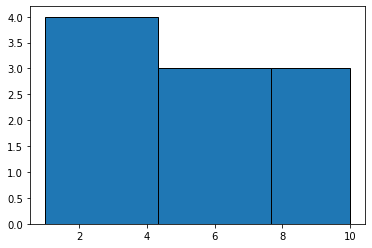

In [9]:
#define function to calculate equal-frequency bins 
import numpy as np

def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
data = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
n, bins, patches = plt.hist(data, equalObs(data, 3), edgecolor='black')
plt.show()

In [10]:
n

array([4., 3., 3.])